## Trabalho Prático - Python para Ciência de Dados

IFMG - Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais - Especialização em Inteligência Artificial  

Mat.: Python para Ciência de Dados 

Prof.: Rodrigo Silva 

Aluno: Christhian da S. Gonçalves 

## 01. Sobre o conjunto de dados

O conjunto principal é uma versão atualizada do conjunto de dados da Califórnia de 1990. Este conjunto de dados foi relatado pela primeira vez no artigo: Sparse Spatial Autoregressions de Pace, R. Kelley e Ronald Barry. Os autores usaram os dados do Censo de 1990. O conjunto de dados atualizado contém os dados coletados pelo American Community Survey de 5 anos do US Census Bureau (2009 - 2020) no nível do grupo de quarteirões.

Grupos de Blocos (BGs) são divisões estatísticas de setores censitários, geralmente definidos para conter entre 600 e 3.000 pessoas, e são usados ​​para apresentar dados e controlar a numeração dos blocos. As variáveis ​​escolhidas dentro de cada grupo de quarteirões são: população, domicílios, total de cômodos, total de dormitórios, valor médio das casas, faixas de renda e faixas etárias das estruturas habitacionais. As variáveis ​​são recuperadas em nível de estado, município, área e grupo de quarteirões.

Link: https://www.kaggle.com/datasets/ebelmagnin/housing?select=california_housing_updated.csv

O conjunto de dados secundário é relacionado a taxas de criminalidade e nos dados de empregos policiais no estado da Califórnia.

Link: https://www.kaggle.com/datasets/fbi-us/california-crime

## 02. Análise Exploratória dos Dados

### 2.1 Importando bibliotecas

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### 2.2 Carregando base de dados

In [191]:
df_house = pd.read_csv("https://raw.githubusercontent.com/christhiangoncalves/Calculo_de_Preco_Casas_California/main/california_housing_updated.csv")
df_crime = pd.read_csv("https://raw.githubusercontent.com/christhiangoncalves/Calculo_de_Preco_Casas_California/091281b784719d16366ab5bd1348d719a70be2d2/ca_offenses_by_city.csv")

### 2.3 Análise dos dados

##### Dados de 'df_house'

In [192]:
display(df_house.info(),'df_house.head()',df_house.head(),'df_house.isna().mean()',df_house.isna().mean(),'df_house.describe()',df_house.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25591 entries, 0 to 25590
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      25591 non-null  object 
 1   total_population          25591 non-null  float64
 2   total_households          25591 non-null  float64
 3   average_household_income  25591 non-null  float64
 4   average_house_age         25591 non-null  float64
 5   total_rooms               25557 non-null  float64
 6   total_bedrooms            25591 non-null  float64
 7   median_house_value        25591 non-null  float64
 8   longitude                 25591 non-null  float64
 9   latitude                  25591 non-null  float64
 10  ocean_proximity           25591 non-null  object 
dtypes: float64(9), object(2)
memory usage: 2.1+ MB


None

'df_house.head()'

,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
0,Alameda County,1713.0,644.0,150520.19,23.5,5300.0,723.0,1633100.0,-122.2344,37.8681,<1H OCEAN
1,Alameda County,1322.0,630.0,167222.22,16.7,4535.0,688.0,1126800.0,-122.2222,37.8587,NEAR BAY
2,Alameda County,940.0,417.0,171948.44,43.0,2800.0,429.0,1646200.0,-122.2480,37.8503,<1H OCEAN
3,Alameda County,1043.0,413.0,150914.04,38.6,2277.0,427.0,1418800.0,-122.2517,37.8457,NEAR BAY
4,Alameda County,1206.0,423.0,167677.30,36.9,2583.0,463.0,1447400.0,-122.2480,37.8450,<1H OCEAN


'df_house.isna().mean()'

name                        0.000000
total_population            0.000000
total_households            0.000000
average_household_income    0.000000
average_house_age           0.000000
total_rooms                 0.001329
total_bedrooms              0.000000
median_house_value          0.000000
longitude                   0.000000
latitude                    0.000000
ocean_proximity             0.000000
dtype: float64

'df_house.describe()'

,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude
count,25591.000000,25591.000000,25591.000000,25591.000000,2.555700e+04,25591.000000,2.559100e+04,25591.000000,25591.000000
mean,1537.494549,512.020398,92004.845269,26.505346,-3.388202e+06,555.310265,-6.236765e+07,-119.487318,35.535162
std,778.122087,234.890550,34058.549719,7.771489,4.742731e+07,255.106035,1.951191e+08,1.957278,2.078309
min,0.000000,0.000000,0.000000,0.000000,-6.666667e+08,0.000000,-6.666667e+08,-124.163400,32.545900
25%,1009.000000,348.000000,66177.610000,21.600000,1.908000e+03,376.000000,2.984000e+05,-121.640100,33.931000
50%,1421.000000,475.000000,89021.440000,26.900000,2.639000e+03,514.000000,4.814000e+05,-118.591100,34.260900
75%,1940.000000,640.500000,115609.600000,32.100000,3.634000e+03,694.000000,7.351500e+05,-117.950950,37.680550
max,39373.000000,7133.000000,212500.000000,45.500000,4.649700e+04,7960.000000,2.000001e+06,-114.346700,41.746200


In [193]:
#Verificando linhas da coluna total_rooms que possui valores negativos
df_house[df_house['total_rooms'] < 0]


,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
302,Alameda County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-117.7864,34.0530,INLAND
336,Alameda County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-122.1425,37.7528,<1H OCEAN
495,Alameda County,75.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-122.2465,37.7789,NEAR BAY
879,Alameda County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-121.9437,37.5089,NEAR OCEAN
904,Alameda County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-121.9713,37.5610,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
24919,Tuolumne County,2375.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-120.5392,37.8936,INLAND
24994,Ventura County,814.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-119.2107,34.2693,NEAR OCEAN
25070,Ventura County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-119.4044,34.0102,ISLAND
25397,Ventura County,124.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-119.5145,33.2499,ISLAND


In [194]:
#median_house_value com valores negativos e linhas com dados consistentes
df_house[df_house['median_house_value'] < 0]



,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
28,Alameda County,653.0,272.0,89209.56,40.6,1595.0,368.0,-666666666.0,-122.2692,37.8300,<1H OCEAN
29,Alameda County,1253.0,398.0,89158.29,38.0,2085.0,430.0,-666666666.0,-122.2754,37.8271,NEAR BAY
39,Alameda County,1462.0,738.0,65250.68,31.4,1798.0,753.0,-666666666.0,-122.2705,37.8153,NEAR BAY
43,Alameda County,872.0,261.0,79952.11,41.0,1331.0,315.0,-666666666.0,-122.2732,37.8174,NEAR BAY
60,Alameda County,655.0,272.0,26231.62,25.8,889.0,294.0,-666666666.0,-122.2862,37.8034,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
25573,Yuba County,575.0,247.0,55435.22,25.8,1159.0,247.0,-666666666.0,-121.3704,39.0317,INLAND
25577,Yuba County,71.0,18.0,73333.33,18.1,91.0,18.0,-666666666.0,-121.3495,39.0898,INLAND
25578,Yuba County,558.0,70.0,95428.57,4.9,476.0,70.0,-666666666.0,-121.3596,39.1074,INLAND
25579,Yuba County,646.0,228.0,54320.18,12.7,1425.0,253.0,-666666666.0,-121.3307,39.1092,INLAND


In [195]:
#Excluindo linhas apartir da coluna total_rooms
df_house = df_house.drop(df_house[df_house['total_rooms'] < 0].index)

#substituir os números negativos da coluna 'median_house_value', pela média da categoria que a linha pertence
df_house_temp = df_house.drop(df_house[df_house['median_house_value'] < 0].index)
df_house_temp = df_house_temp.groupby('name')['median_house_value'].mean()
#df_house_temp = df_house_temp.set_index('name')['median_house_value'] 

#Função para substituir os números negativos pela média da categoria
def subst_negat(median_house_value, name):
    return median_house_value if median_house_value >= 0 else df_house_temp[name]

# Substituir os números negativos pela média da categoria usando a função map
df_house['median_house_value'] = df_house.apply(lambda row: subst_negat(row['median_house_value'], row['name']), axis=1)

df_house_temp.reset_index()
#verificando resultado
df_house.merge(df_house_temp, on='median_house_value')



,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
0,Alameda County,653.0,272.0,89209.56,40.6,1595.0,368.0,819936.834302,-122.2692,37.8300,<1H OCEAN
1,Alameda County,1253.0,398.0,89158.29,38.0,2085.0,430.0,819936.834302,-122.2754,37.8271,NEAR BAY
2,Alameda County,1462.0,738.0,65250.68,31.4,1798.0,753.0,819936.834302,-122.2705,37.8153,NEAR BAY
3,Alameda County,872.0,261.0,79952.11,41.0,1331.0,315.0,819936.834302,-122.2732,37.8174,NEAR BAY
4,Alameda County,655.0,272.0,26231.62,25.8,889.0,294.0,819936.834302,-122.2862,37.8034,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
2286,Yuba County,575.0,247.0,55435.22,25.8,1159.0,247.0,256866.000000,-121.3704,39.0317,INLAND
2287,Yuba County,71.0,18.0,73333.33,18.1,91.0,18.0,256866.000000,-121.3495,39.0898,INLAND
2288,Yuba County,558.0,70.0,95428.57,4.9,476.0,70.0,256866.000000,-121.3596,39.1074,INLAND
2289,Yuba County,646.0,228.0,54320.18,12.7,1425.0,253.0,256866.000000,-121.3307,39.1092,INLAND


In [196]:
df_house[df_house['total_households'] <= 0]

,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
3971,Lassen County,8193.0,0.0,0.0,24.2,NaN,24.0,205427.272727,-121.5733,39.1183,INLAND
18009,San Diego County,3443.0,0.0,0.0,30.5,NaN,11.0,636838.718019,-117.1990,32.7398,NEAR OCEAN
21882,Santa Barbara County,13.0,0.0,0.0,16.7,29.0,17.0,770377.379182,-119.9233,33.9806,ISLAND
24906,Tuolumne County,45.0,0.0,0.0,40.4,311.0,91.0,327738.775510,-119.5269,37.9444,INLAND


In [197]:

df_house[df_house.isnull().any(axis=1)]

,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
467,Alameda County,11.0,5.0,87500.00,40.5,NaN,5.0,8.199368e+05,-122.3016,37.8380,NEAR BAY
3007,Humboldt County,991.0,15.0,87500.00,25.5,NaN,15.0,3.423439e+05,-119.2917,34.4475,INLAND
3971,Lassen County,8193.0,0.0,0.00,24.2,NaN,24.0,2.054273e+05,-121.5733,39.1183,INLAND
6997,Los Angeles County,2056.0,4.0,162500.00,5.5,NaN,4.0,6.971177e+05,-117.8169,34.0574,INLAND
9305,Los Angeles County,260.0,11.0,106136.36,34.1,NaN,11.0,6.971177e+05,-118.1994,33.7860,<1H OCEAN
10407,Los Angeles County,32.0,16.0,37500.00,15.5,NaN,16.0,6.971177e+05,-118.4664,34.4100,INLAND
10535,Los Angeles County,65.0,17.0,52500.00,25.5,NaN,17.0,6.971177e+05,-118.4929,34.2105,INLAND
10548,Los Angeles County,45.0,14.0,76785.71,28.4,NaN,14.0,6.971177e+05,-118.3731,34.2664,INLAND
10557,Los Angeles County,14.0,14.0,7500.00,30.5,NaN,14.0,6.971177e+05,-118.2097,33.7565,NEAR OCEAN
10558,Los Angeles County,9.0,9.0,67500.00,35.5,NaN,9.0,6.971177e+05,-118.0474,33.9034,<1H OCEAN


In [198]:
#Eliminando linhas total_households com dados faltantes
df_house = df_house.drop(df_house[df_house['total_households'] <= 0].index)

temp = df_house.drop(df_house[df_house['total_rooms'] < 0].index)
temp = temp.groupby('name')['total_rooms'].mean()
#df_house_temp = df_house_temp.set_index('name')['median_house_value'] 

#Função para substituir os números negativos pela média da categoria
def subst_negat(median_house_value, name):
    return median_house_value if median_house_value >= 0 else temp[name]

# Substituir os números negativos pela média da categoria usando a função map
df_house['total_rooms'] = df_house.apply(lambda row: subst_negat(row['total_rooms'], row['name']), axis=1)


df_house = df_house.drop(df_house[df_house['total_rooms'] <= 0].index)

temp.reset_index()
#verificando resultado
df_house.merge(temp, on='total_rooms')


,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
0,Alameda County,11.0,5.0,87500.00,40.5,2724.664889,5.0,8.199368e+05,-122.3016,37.8380,NEAR BAY
1,Alpine County,1159.0,397.0,90925.69,22.4,8006.000000,1794.0,3.725000e+05,-120.1317,39.5629,INLAND
2,Sacramento County,3537.0,1155.0,114491.34,11.7,8006.000000,1155.0,3.873000e+05,-117.3114,34.0530,INLAND
3,Humboldt County,991.0,15.0,87500.00,25.5,2820.132743,15.0,3.423439e+05,-119.2917,34.4475,INLAND
4,Los Angeles County,2056.0,4.0,162500.00,5.5,2606.779731,4.0,6.971177e+05,-117.8169,34.0574,INLAND
5,Los Angeles County,260.0,11.0,106136.36,34.1,2606.779731,11.0,6.971177e+05,-118.1994,33.7860,<1H OCEAN
6,Los Angeles County,32.0,16.0,37500.00,15.5,2606.779731,16.0,6.971177e+05,-118.4664,34.4100,INLAND
7,Los Angeles County,65.0,17.0,52500.00,25.5,2606.779731,17.0,6.971177e+05,-118.4929,34.2105,INLAND
8,Los Angeles County,45.0,14.0,76785.71,28.4,2606.779731,14.0,6.971177e+05,-118.3731,34.2664,INLAND
9,Los Angeles County,14.0,14.0,7500.00,30.5,2606.779731,14.0,6.971177e+05,-118.2097,33.7565,NEAR OCEAN


In [199]:
#Transformando categorias em pesos numéricos
idprox,prox = df_house['ocean_proximity'].factorize()
df_house['ocean_prox_sort'] = idprox
display(df_house['ocean_proximity'].value_counts(), df_house['ocean_prox_sort'].value_counts())


ocean_proximity
INLAND        12869
<1H OCEAN      6436
NEAR OCEAN     3853
NEAR BAY       2297
ISLAND            2
Name: count, dtype: int64

ocean_prox_sort
2    12869
0     6436
3     3853
1     2297
4        2
Name: count, dtype: int64

In [200]:
#Para normalizar os dados é realizado a média de quartos por familia, para trazer informação util
df_house['total_rooms_/_total_households'] = df_house['total_rooms'] /df_house['total_households']

#Para normalizar os dados é realizado a média da renda familiar por por familia
df_house['household_income'] = df_house['average_household_income'] /df_house['total_households']
#Excluir colunas não relevantes
del df_house['total_rooms'] 
del df_house['ocean_proximity']
del df_house['average_household_income']
df_house

,name,total_population,total_households,average_house_age,total_bedrooms,median_house_value,longitude,latitude,ocean_prox_sort,total_rooms_/_total_households,household_income
0,Alameda County,1713.0,644.0,23.5,723.0,1633100.0,-122.2344,37.8681,0,8.229814,233.727003
1,Alameda County,1322.0,630.0,16.7,688.0,1126800.0,-122.2222,37.8587,1,7.198413,265.432095
2,Alameda County,940.0,417.0,43.0,429.0,1646200.0,-122.2480,37.8503,0,6.714628,412.346379
3,Alameda County,1043.0,413.0,38.6,427.0,1418800.0,-122.2517,37.8457,1,5.513317,365.409298
4,Alameda County,1206.0,423.0,36.9,463.0,1447400.0,-122.2480,37.8450,0,6.106383,396.400236
...,...,...,...,...,...,...,...,...,...,...,...
25586,Yuba County,1135.0,565.0,21.2,590.0,496500.0,-121.3437,39.2926,2,6.867257,152.752761
25587,Yuba County,841.0,371.0,23.9,590.0,215500.0,-121.1380,39.4516,2,7.016173,167.410135
25588,Yuba County,953.0,378.0,24.6,425.0,246800.0,-121.3199,39.4271,2,6.087302,118.627698
25589,Yuba County,957.0,447.0,29.1,594.0,266700.0,-121.2128,39.4224,2,7.982103,144.925906


##### Dados de 'df_crime'

In [201]:
display(df_crime.info(),'df_crime.head()',df_crime.head(),'df_crime.isna().mean',df_crime.isna().mean(),'df_crimey.describe()',df_crime.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   City                                  460 non-null    object 
 1   Population                            460 non-null    object 
 2   Violent crime                         460 non-null    object 
 3   Murder and nonnegligent manslaughter  460 non-null    int64  
 4   Rape (revised definition)             460 non-null    object 
 5   Rape (legacy definition)              0 non-null      float64
 6   Robbery                               460 non-null    object 
 7   Aggravated assault                    460 non-null    object 
 8   Property crime                        460 non-null    object 
 9   Burglary                              460 non-null    object 
 10  Larceny-theft                         460 non-null    object 
 11  Motor vehicle theft

None

'df_crime.head()'

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adelanto,"33,005",212,2,14,NaN,48,148,808,434,254,120,24
1,Agoura Hills,"20,970",15,0,1,NaN,6,8,310,82,217,11,0
2,Alameda,"78,613",148,2,7,NaN,61,78,"1,819",228,"1,245",346,18
3,Albany,"19,723",34,1,6,NaN,16,11,605,95,447,63,0
4,Alhambra3,"86,175",168,1,13,NaN,74,80,"1,929",305,"1,413",211,6


'df_crime.isna().mean'

City                                    0.0
Population                              0.0
Violent crime                           0.0
Murder and nonnegligent manslaughter    0.0
Rape (revised definition)               0.0
Rape (legacy definition)                1.0
Robbery                                 0.0
Aggravated assault                      0.0
Property crime                          0.0
Burglary                                0.0
Larceny-theft                           0.0
Motor vehicle theft                     0.0
Arson                                   0.0
dtype: float64

'df_crimey.describe()'

,Murder and nonnegligent manslaughter,Rape (legacy definition)
count,460.000000,0.0
mean,3.165217,NaN
std,14.971101,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,1.000000,NaN
75%,2.000000,NaN
max,282.000000,NaN


In [202]:
#Realizado o tratamento das colunas do nome da cidade para realizar o merge de forma correta
df_house['nameid'] = df_house['name'].str.replace(' County', '')


In [203]:
df_crime = df_crime.replace(',', '', regex=True)

df_crime['City'] = df_crime['City'].str.replace('3', '')

df_crime[['Population','Violent crime','Murder and nonnegligent manslaughter','Rape (revised definition)','Robbery','Aggravated assault','Property crime','Burglary','Larceny-theft','Motor vehicle theft','Arson']] = df_crime[['Population','Violent crime','Murder and nonnegligent manslaughter','Rape (revised definition)','Robbery','Aggravated assault','Property crime','Burglary','Larceny-theft','Motor vehicle theft','Arson']].astype(int)
df_crime['Rape (legacy definition)']

df_crime['violence_rate'] = (df_crime['Violent crime'] + df_crime['Murder and nonnegligent manslaughter'] + df_crime['Rape (revised definition)'] +
                             df_crime['Robbery'] + df_crime['Aggravated assault'] + df_crime['Property crime'] + df_crime['Burglary'] + 
                             df_crime['Larceny-theft'] + df_crime['Motor vehicle theft'] + df_crime['Arson'])/df_crime['Population']

df_crime_select = df_crime[["City",'violence_rate']]


In [204]:
#Realizando o merge dos dataframes
df_merged_h_c = pd.merge(df_house, df_crime_select, left_on='nameid',right_on='City', how='left')
df_merged_h_c
df_merged_h_c.isna().mean()

#df = df_merged_h_c[df_merged_h_c.isnull().any(axis=1)]
#df.groupby('nameid').size().reset_index()


name                              0.000000
total_population                  0.000000
total_households                  0.000000
average_house_age                 0.000000
total_bedrooms                    0.000000
median_house_value                0.000000
longitude                         0.000000
latitude                          0.000000
ocean_prox_sort                   0.000000
total_rooms_/_total_households    0.000000
household_income                  0.000000
nameid                            0.000000
City                              0.174765
violence_rate                     0.174765
dtype: float64

In [205]:
#Excluindo valores nulos
df_merged_h_c = df_merged_h_c.dropna()
df_merged_h_c.isna().mean()

name                              0.0
total_population                  0.0
total_households                  0.0
average_house_age                 0.0
total_bedrooms                    0.0
median_house_value                0.0
longitude                         0.0
latitude                          0.0
ocean_prox_sort                   0.0
total_rooms_/_total_households    0.0
household_income                  0.0
nameid                            0.0
City                              0.0
violence_rate                     0.0
dtype: float64

## 03. Visualização de dados

In [206]:

df_merged_h_c = df_merged_h_c.drop(columns=['nameid','City'])
df_merged_h_c.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21008 entries, 0 to 25264
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            21008 non-null  object 
 1   total_population                21008 non-null  float64
 2   total_households                21008 non-null  float64
 3   average_house_age               21008 non-null  float64
 4   total_bedrooms                  21008 non-null  float64
 5   median_house_value              21008 non-null  float64
 6   longitude                       21008 non-null  float64
 7   latitude                        21008 non-null  float64
 8   ocean_prox_sort                 21008 non-null  int64  
 9   total_rooms_/_total_households  21008 non-null  float64
 10  household_income                21008 non-null  float64
 11  violence_rate                   21008 non-null  float64
dtypes: float64(10), int64(1), object(1)
m

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


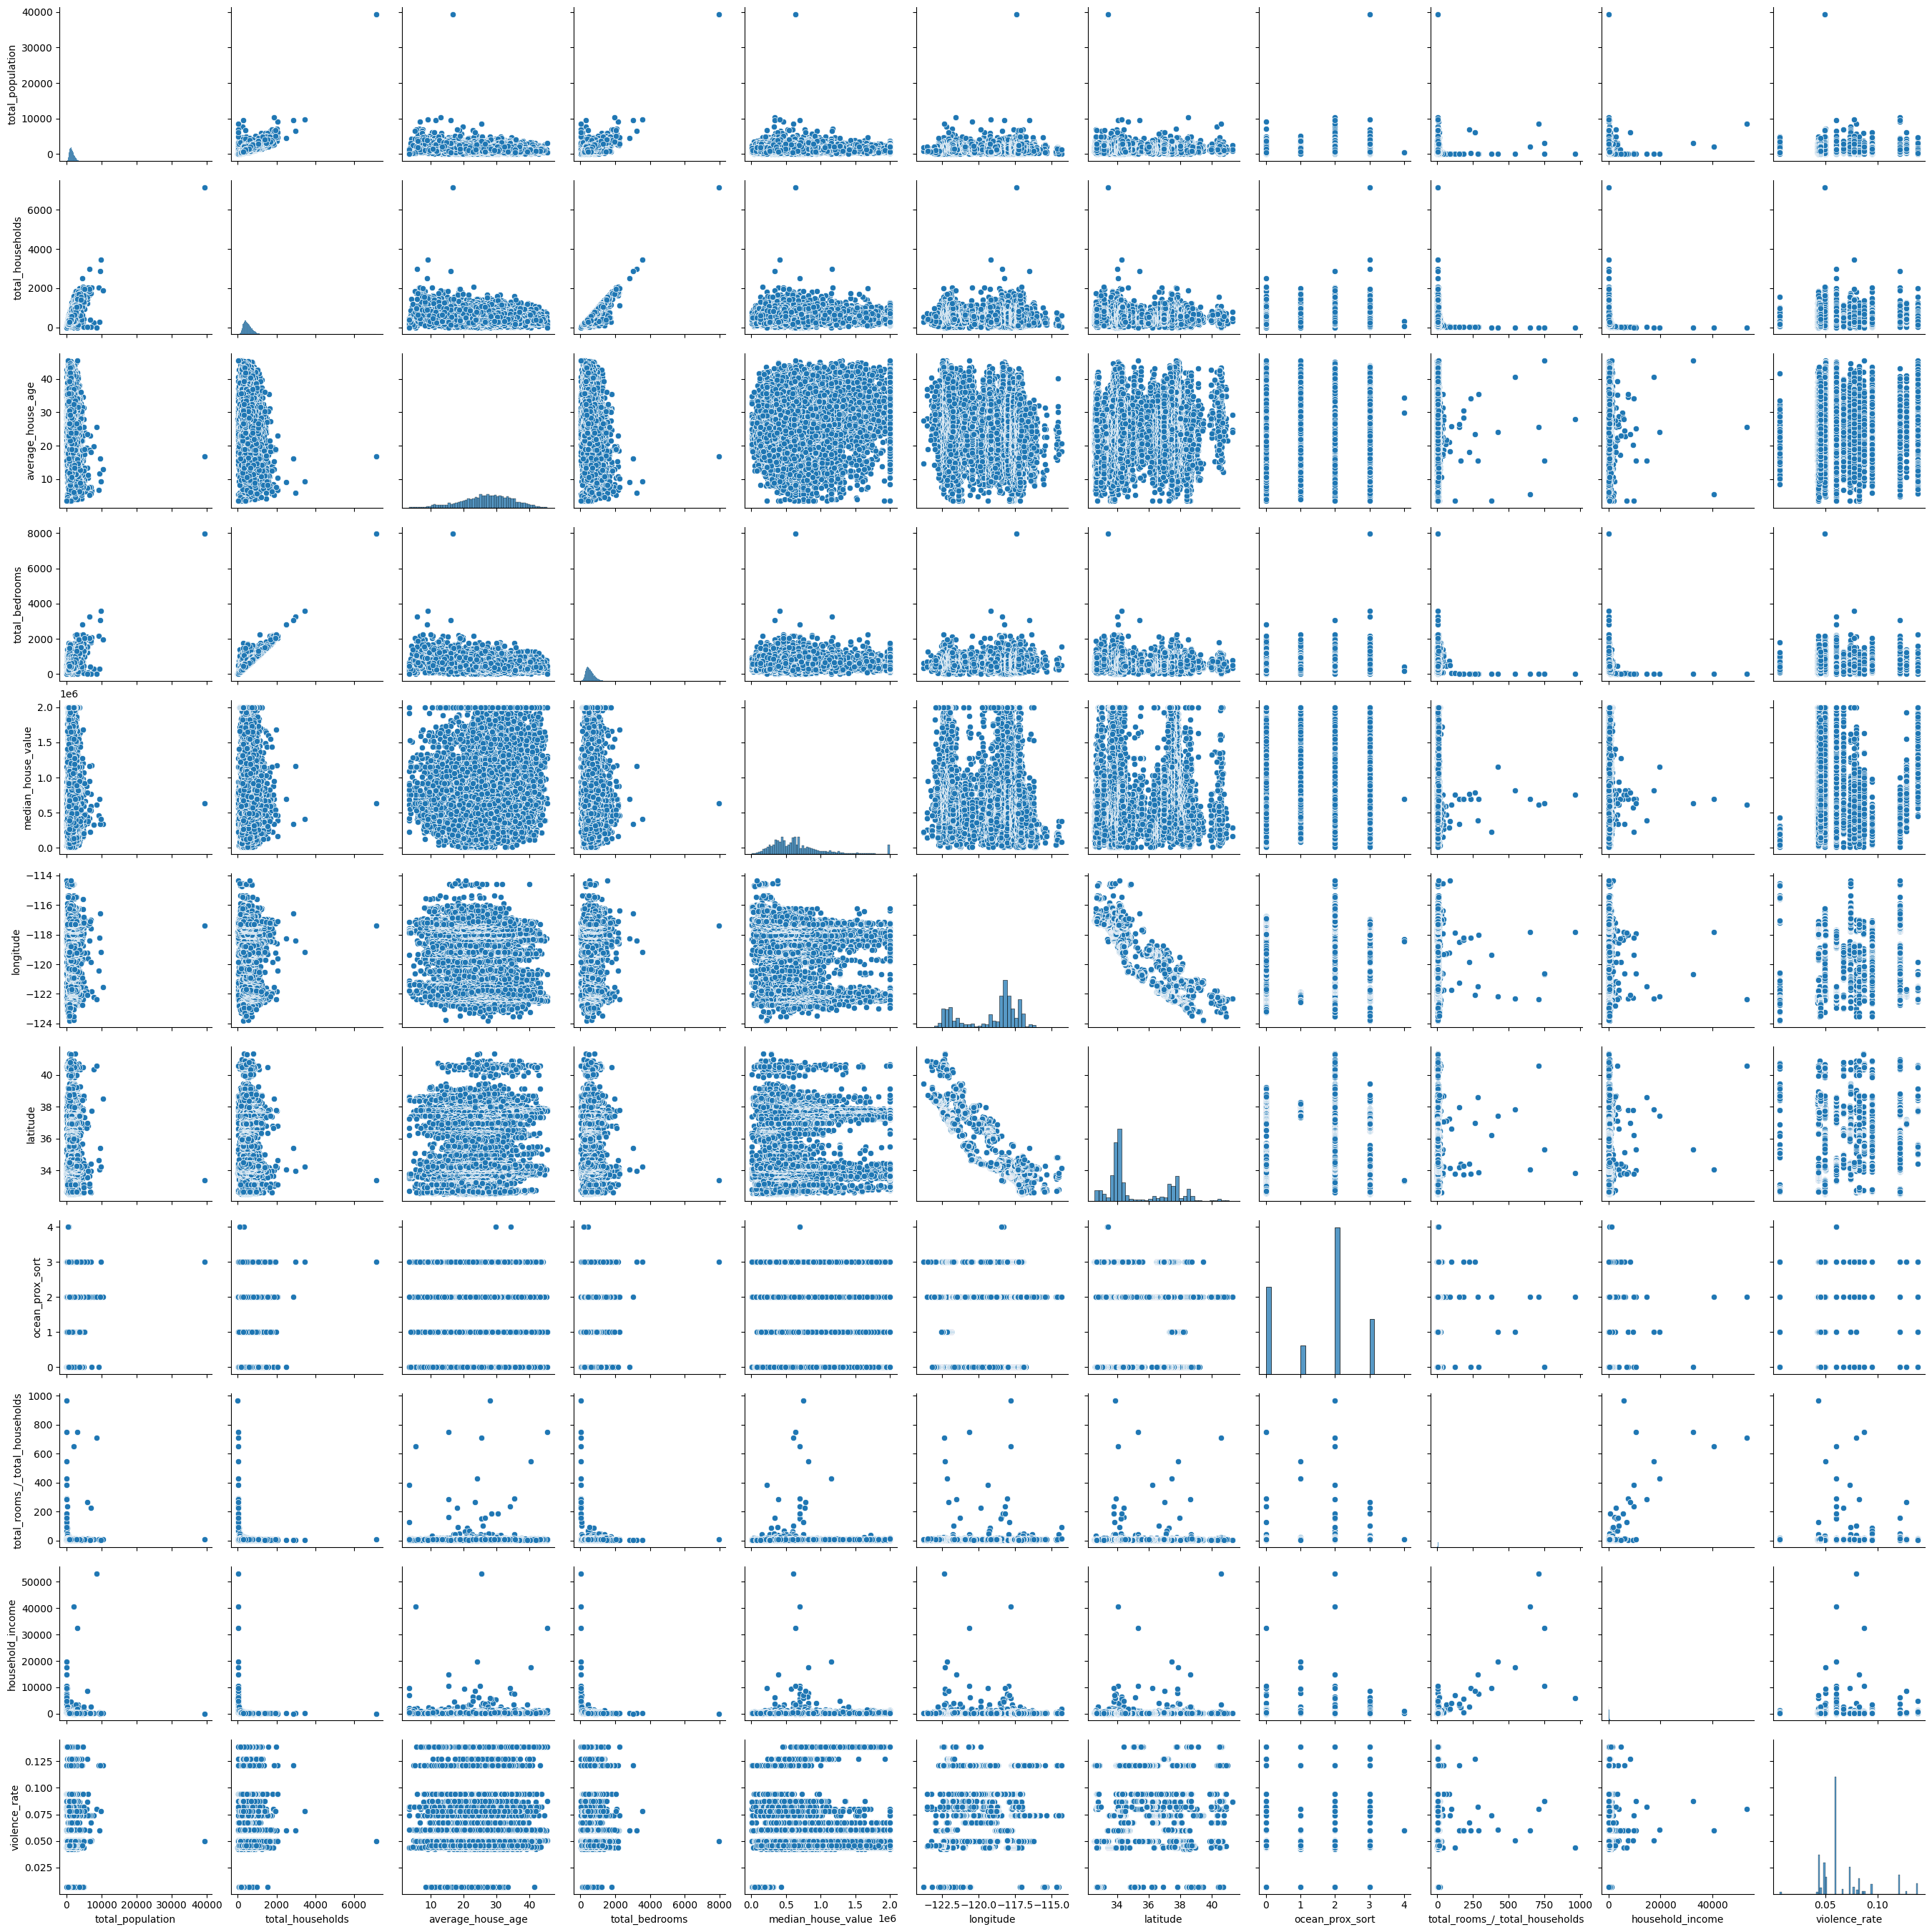

In [207]:
sns.pairplot(df_merged_h_c)

<Axes: >

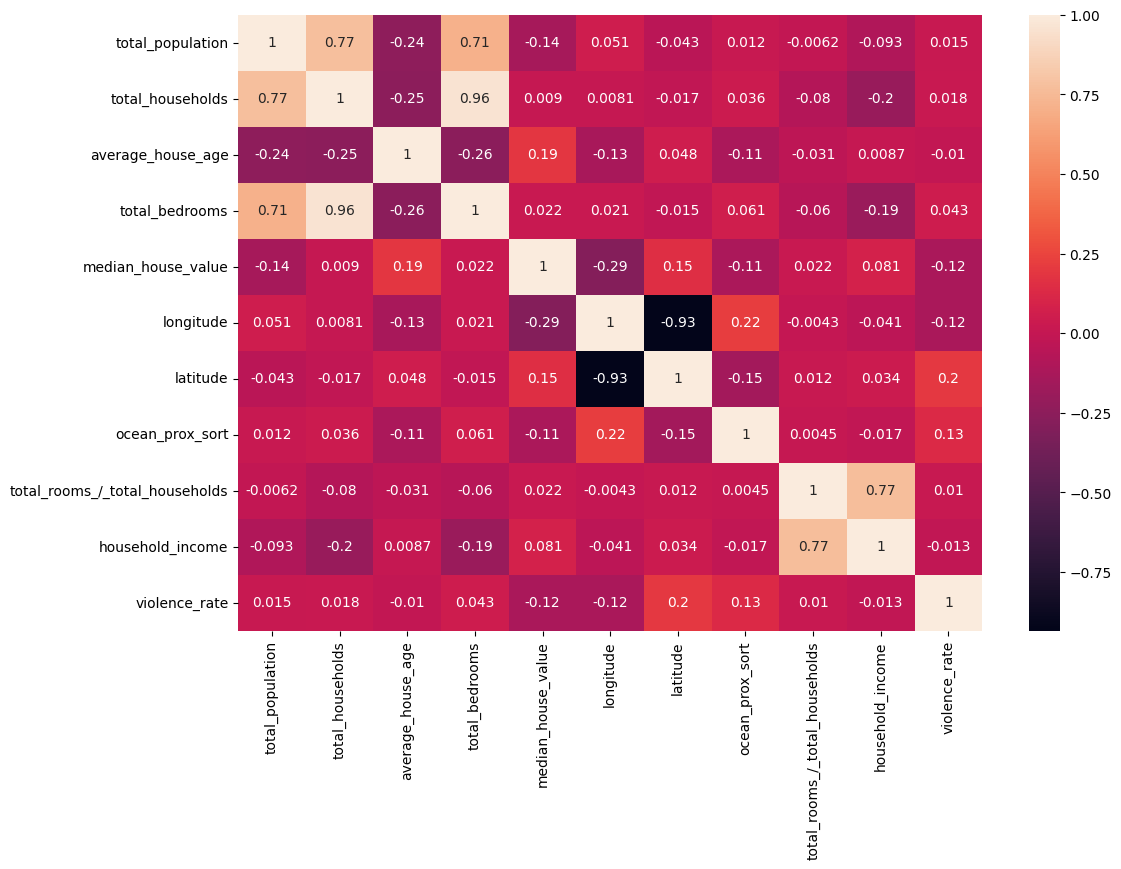

In [208]:
df_merged_h_c = df_merged_h_c.drop(columns=['name'])
plt.figure(figsize=(12,8))
sns.heatmap(df_merged_h_c.corr(),annot=True)

In [225]:
df_merged_h_c

,total_population,total_households,average_house_age,total_bedrooms,median_house_value,longitude,latitude,ocean_prox_sort,total_rooms_/_total_households,household_income,violence_rate
0,1713.0,644.0,23.5,723.0,1633100.0,-122.2344,37.8681,0,8.229814,233.727003,0.050272
1,1322.0,630.0,16.7,688.0,1126800.0,-122.2222,37.8587,1,7.198413,265.432095,0.050272
2,940.0,417.0,43.0,429.0,1646200.0,-122.2480,37.8503,0,6.714628,412.346379,0.050272
3,1043.0,413.0,38.6,427.0,1418800.0,-122.2517,37.8457,1,5.513317,365.409298,0.050272
4,1206.0,423.0,36.9,463.0,1447400.0,-122.2480,37.8450,0,6.106383,396.400236,0.050272
...,...,...,...,...,...,...,...,...,...,...,...
25260,583.0,235.0,22.9,235.0,922300.0,-119.2009,34.2929,3,7.008511,598.415574,0.077755
25261,2906.0,1049.0,26.6,1290.0,892000.0,-119.2244,34.3043,3,8.650143,138.833480,0.077755
25262,1125.0,309.0,29.3,371.0,422000.0,-118.7852,34.3978,2,6.375405,295.739482,0.077755
25263,1294.0,380.0,23.8,401.0,372900.0,-118.8004,34.4066,2,5.428947,177.146816,0.077755


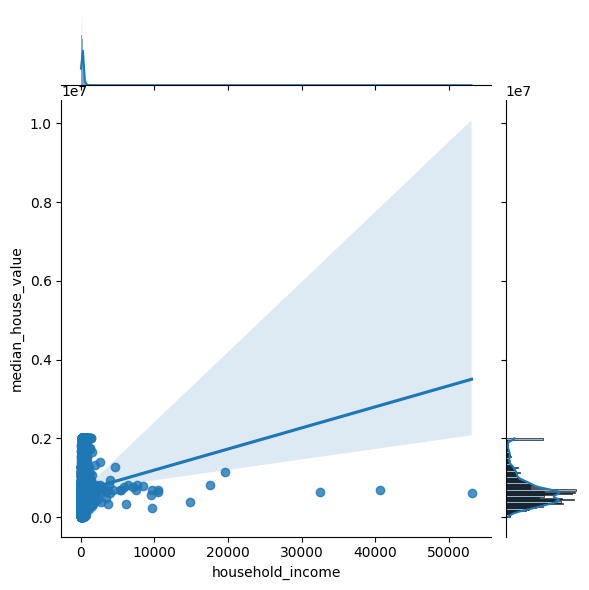

In [224]:
sns.jointplot(data=df_merged_h_c,y='median_house_value',x='household_income',kind='reg')


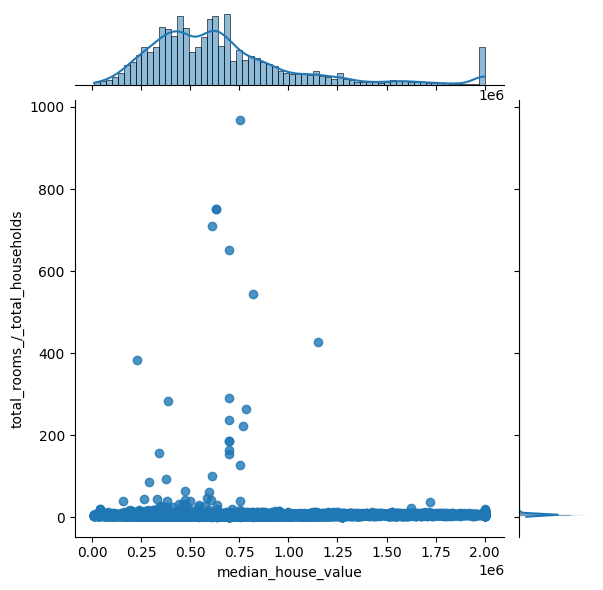

In [219]:
sns.jointplot(data=df_merged_h_c,x='median_house_value',y='total_rooms_/_total_households',kind='reg')

In [221]:
retirando outliers
df_merged_h_c.drop(df_merged_h_c[df_merged_h_c['total_rooms_/_total_households']>20].index.to_list(),axis=0,inplace=True)
df_merged_h_c.shape()

SyntaxError: invalid syntax (2666525996.py, line 1)

<Axes: xlabel='longitude', ylabel='latitude'>

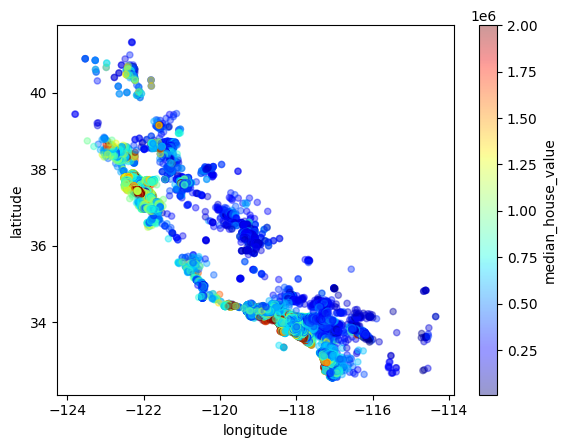

In [222]:
df_merged_h_c.plot(kind='scatter', x='longitude', y='latitude',alpha=0.4,c='median_house_value',cmap=plt.get_cmap("jet"))

<Axes: xlabel='longitude', ylabel='latitude'>

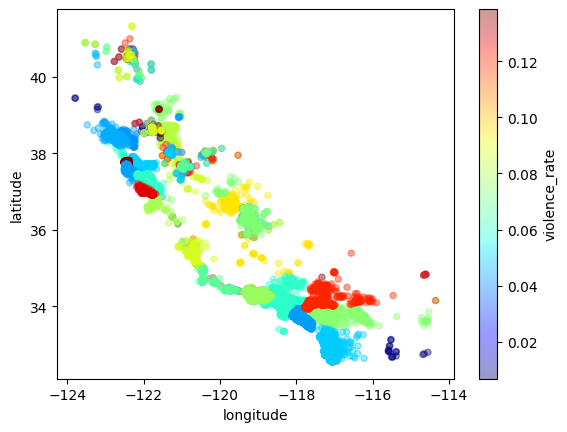

In [223]:
df_merged_h_c.plot(kind='scatter', x='longitude', y='latitude',alpha=0.4,c='violence_rate',cmap=plt.get_cmap("jet"))
